# Gráficos base de datos de sismos

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
        
from datetime import datetime

In [14]:
datos=pd.read_csv('datos.txt', sep='\t')
datos.head()

,year,month,day,hour,min,sec,lat,lon,depth,mag
0,2019,1,1,3,44,51.4,10.252,-68.170,12.9,2.0
1,2019,1,1,3,50,20.2,10.243,-68.146,8.0,2.3
2,2019,1,1,4,20,28.6,10.220,-68.104,2.4,2.0
3,2019,1,1,6,42,24.7,10.199,-68.119,17.3,3.0
4,2019,1,1,7,3,50.1,11.186,-69.751,15.5,2.9


Crea una columna con tiempo origen del sismo en formato **yyyy-mm-dd HH:MM:SS.sss**

In [15]:
# Crea la columna con los segundos decimales en microsegundos
datos['microsec']=(1e5*(datos.sec-datos.sec.astype(int))).astype(int) 
# Convierte los segundos a entero
datos['sec']=datos.sec.astype(int)


In [16]:
# Se usa la función conver2date para convertir los string a formato tiempo
def convert2date(row):
    return(datetime(row[0],row[1], row[2], row[3], row[4], row[5], row[6]).
                               strftime('%Y-%m-%d %H:%M:%S.%f'))

#columnas que se usarn para crear la columna tiempo origen
row=['year','month','day','hour','min','sec','microsec']

#usamos el metodo apply para aplicar la función a cada fila del dataframe datos
datos['Tiempo Origen'] = (datos[row].apply(convert2date,axis=1)
                            .astype("datetime64[ms]"))

#Se crea un dataframe con la información que se necesita 
#(tiempo, lat, lon, depth, mag) luego se cambian los nombres
df=(datos[['Tiempo Origen', 'lat','lon','depth','mag']]
        .rename(columns={'lat':'Latitud',
                         'lon':'Longitud',
                         'depth':'Profundidad', 
                         'mag':'Magnitud'}))

df.head()

,Tiempo Origen,Latitud,Longitud,Profundidad,Magnitud
0,2019-01-01 03:44:51.039,10.252,-68.170,12.9,2.0
1,2019-01-01 03:50:20.019,10.243,-68.146,8.0,2.3
2,2019-01-01 04:20:28.060,10.220,-68.104,2.4,2.0
3,2019-01-01 06:42:24.069,10.199,-68.119,17.3,3.0
4,2019-01-01 07:03:50.010,11.186,-69.751,15.5,2.9


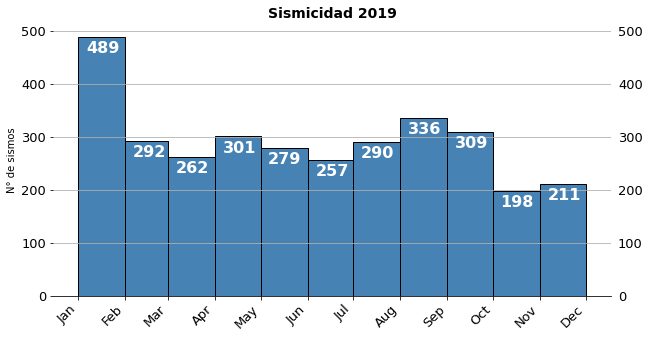

In [23]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,1, figsize=(10,5))

#bins para el histograma
bins=np.arange('2019-01-01', '2020-01-31', dtype='datetime64[M]')

histo=ax.hist(datos['Tiempo Origen'], bins=bins, 
              rwidth=1.0 ,color='steelblue', edgecolor='k')

for n, h in enumerate(histo[0]):
    if histo[0][n]>0:
        ax.text(histo[1][n]+16,histo[0][n]-30.0,str(int(histo[0][n])),
                ha='center',fontsize=16, color='white', fontweight='bold')

#Se da formato al grafico eliminando lineas superior derecha e izquierda
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right')

ax.tick_params(labelsize=13, labelright=True)
ax.set_ylabel('N° de sismos')
ax.set_title('Sismicidad 2019',fontsize=14,weight='bold');
ax.set_xticks(np.arange('2019-01-01', '2020-01-31', dtype='datetime64[M]'))


fig.savefig('sismicida_mensual.png')

# Barplot con número de sismos por semana


In [24]:
df_week=pd.DataFrame({'numero':df['Tiempo Origen']
                      .groupby(df["Tiempo Origen"].dt.isocalendar().week).count()})
df_week.reset_index(inplace=True)
df_week.head()

,week,numero
0,1,115
1,2,146
2,3,106
3,4,98
4,5,73


In [25]:
def format_grafico(axn,labelx,labely):
    #Funcion para dar algunos formatos al grafico
    #Entrada: axes (axn),etiqueta eje x (labelx), etiqueta eje y (labely)
    axn.spines['top'].set_visible(False)
    axn.spines['right'].set_visible(False)
    axn.spines['left'].set_visible(False)
    axn.tick_params(labelsize=10, labelright=True)
    axn.yaxis.grid(True)
    
    axn.set_xlabel(labelx, fontsize=16, fontweight='bold')
    axn.set_ylabel(labely, fontsize=16, fontweight='bold')

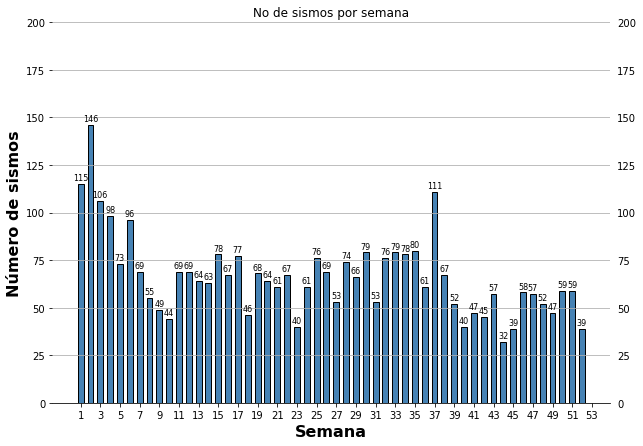

In [27]:
fig, ax=plt.subplots(1,1,figsize=(10,7))

bars=ax.bar(df_week['week'],df_week['numero'],edgecolor='k',color='steelblue',width=0.6)
#bars2=ax.bar(df_week['week']+0.25,df_week['acumulado'],edgecolor='k',color='gray',width=0.5,alpha=0.5)
for bar in bars:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+2, str(int(bar.get_height())),ha='center', color='k', 
            fontsize=8)
ax.set_xticks(np.arange(1,54,2))
ax.set_ylim(0,200)
ax.set_title('No de sismos por semana')
format_grafico(ax,'Semana','Número de sismos')

plt.savefig('sismos_semanales.png', dpi=120)